In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
df.head(5)

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     201718
noballs                   207196
byes                      207495
legbyes                   204754
penalty                   208040
wicket_type               197803
player_dismissed          197803
other_wicket_type         208042
other_player_dismissed    208042
dtype: int64

In [3]:
df.shape

(208042, 22)

In [4]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
print('\n all teams : ',df['batting_team'].unique())


 all teams :  ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Deccan Chargers' 'Mumbai Indians'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings']


In [6]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [6]:
runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs.columns=['Batsman','Runs']
y = runs.sort_values(by='Runs',ascending=False ).head(15)
y

,Batsman,Runs
527,V Kohli,6293
426,S Dhawan,5784
396,RG Sharma,5613
457,SK Raina,5536
120,DA Warner,5451
24,AB de Villiers,5181
100,CH Gayle,4997
316,MS Dhoni,4746
417,RV Uthappa,4724
160,G Gambhir,4217


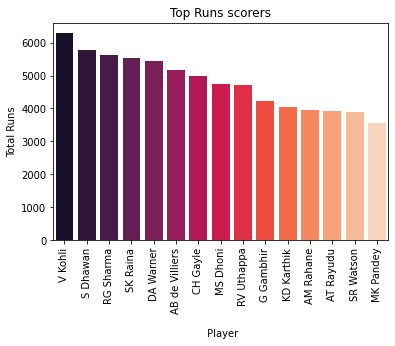

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()
sns.barplot(x=y['Batsman'],y=y['Runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player')
plt.ylabel('Total Runs')
plt.title('Top Runs scorers')
plt.savefig('kk.png')

In [9]:
player=(df['striker']=='V Kohli')
df_kohli=df[player]
df_kohli.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
132,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1.3,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
134,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1.4,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2.1,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,bowled,V Kohli,NaN,NaN


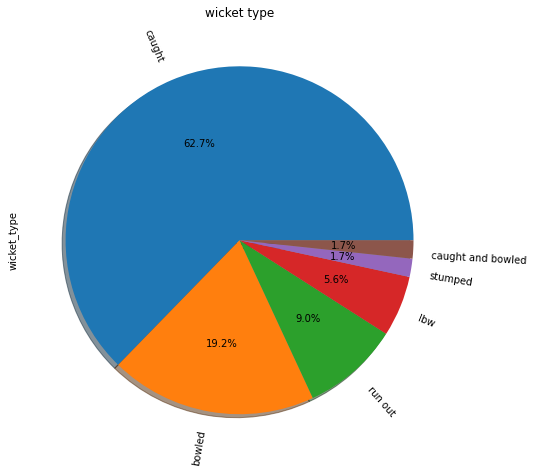

<Figure size 432x288 with 0 Axes>

In [10]:
df_kohli['wicket_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,8),shadow=True,rotatelabels=True)
plt.title('wicket type')
plt.show()
plt.savefig('kk1.png')

In [14]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli[ 'runs_off_bat']==runs])*runs
print("Runs scored from 1's:",count(df_kohli,1))
print("Runs scored from 2's:",count(df_kohli,2))
print("Runs scored from 3's:",count(df_kohli,3))
print("Runs scored from 4's:",count(df_kohli,4))
print("Runs scored from 6's:",count(df_kohli,6))

Runs scored from 1's: 2066
Runs scored from 2's: 720
Runs scored from 3's: 45
Runs scored from 4's: 2196
Runs scored from 6's: 1266


In [15]:
team=(df['batting_team']=='Royal Challengers Bangalore')
df_rcb=df[team]
df_rcb.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


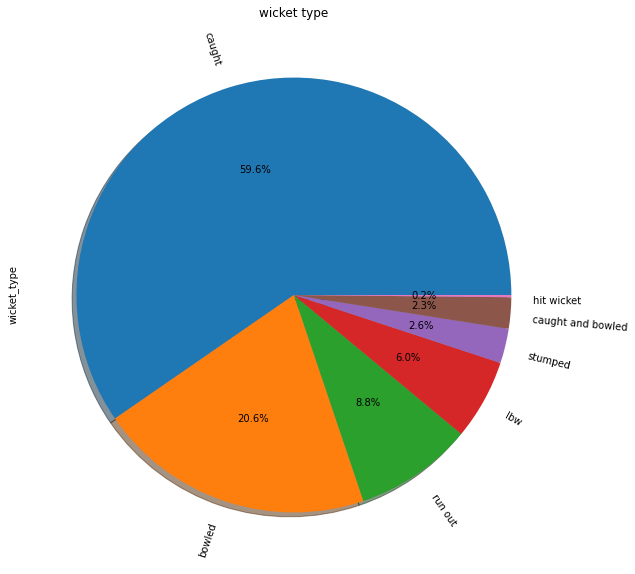

In [17]:
df_rcb['wicket_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(16,10),shadow=True,rotatelabels=True)
plt.title('wicket type')
plt.show()

<AxesSubplot:xlabel='Teams'>

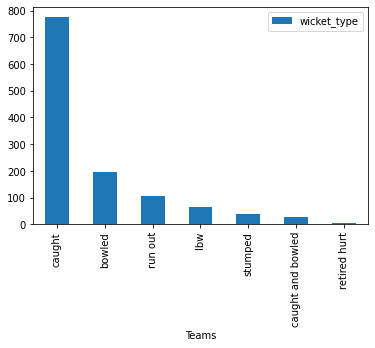

In [18]:
bowling_wicket=df[df['bowling_team']=='Royal Challengers Bangalore']['wicket_type'].value_counts().reset_index()
bowling_wicket.style.hide_index()
bowling_wicket.rename(columns={'index':'Teams','bowling_team':'run out '},inplace=True)
s2 =bowling_wicket.head(25)
s2.plot.bar(x="Teams")

<AxesSubplot:xlabel='Teams'>

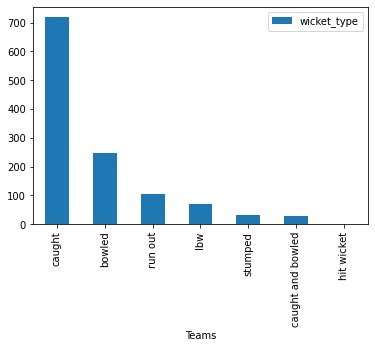

In [21]:
batting_wicket=df[df['batting_team']=='Royal Challengers Bangalore']['wicket_type'].value_counts().reset_index()
batting_wicket.style.hide_index()
batting_wicket.rename(columns={'index':'Teams','batting_team':'run out '},inplace=True)
s2 =batting_wicket.head(25)
s2.plot.bar(x="Teams")

In [22]:
runs1 = df.groupby(['batting_team'])['runs_off_bat'].sum().reset_index()
runs1.columns=['Batting team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y

,Batting team,Runs
8,Mumbai Indians,32603
14,Royal Challengers Bangalore,30963
7,Kolkata Knight Riders,30221
0,Chennai Super Kings,29569
5,Kings XI Punjab,28541
11,Rajasthan Royals,25447
3,Delhi Daredevils,23022
15,Sunrisers Hyderabad,20383
1,Deccan Chargers,10885
2,Delhi Capitals,7473


Text(0.5, 1.0, 'Total Runs scored by all Teams')

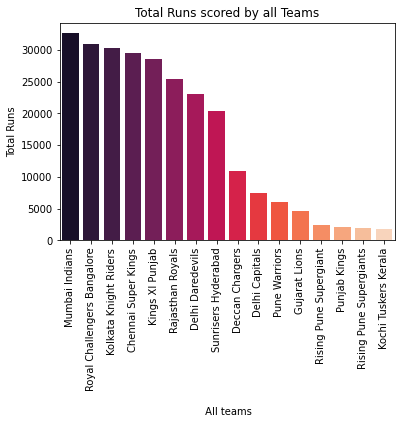

In [26]:
ax = plt.axes()
sns.barplot(x=y['Batting team'],y=y['Runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n All teams')
plt.ylabel('Total Runs')
plt.title('Total Runs scored by all Teams')

<AxesSubplot:xlabel='Rcb Batsman'>

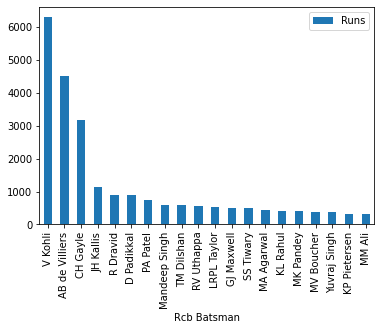

In [25]:
runs2 = df_rcb.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs2.columns=['Rcb Batsman','Runs']
y3 = runs2.sort_values(by='Runs',ascending=False ).head(20)
y3.plot.bar('Rcb Batsman','Runs')

In [ ]:
team=(df['batting_team']=='Royal Challengers Bangalore')
df_rcb=df[team]
df_rcb.head()

In [40]:
df_upto2020= pd.read_csv(r"C:./Desktop/all_season_summary.csv")
df_upto2020.head(5)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2020,1216492,Mumbai Indians v Chennai Super Kings,Mumbai Indians v Chennai Super Kings,"1st Match (N), Indian PreMumbai Indianser Leag...",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,BOWL FIRST,162/9,...,"Rohit Sharma (BT),Quinton de Kock (WK),Suryaku...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Ambati Rayudu,Faf du Plessis","Lungi Ngidi,Deepak Chahar",19 September 2020 - night match (20-over match),Chris Gaffaney,Virender Sharma,Sundaram Ravi,Manu Nayyar,Ulhas Gandhe
1,2020,1216493,Delhi Capitals v Kings XI Punjab,Delhi Capitals v Kings XI Punjab,"2nd Match (N), Indian PreMumbai Indianser Leag...",Delhi Capitals,Kings XI Punjab,Kings XI Punjab,BOWL FIRST,157/8,...,"Prithvi Shaw (BT),Shikhar Dhawan (BT),Shimron ...","KL Rahul (WK),Mayank Agarwal (BT),Karun Nair (...","Mayank Agarwal,KL Rahul","Mohammed ShaMumbai Indians,Sheldon Cottrell",20 September 2020 - night match (20-over match),Anil Chaudhary,Nitin Menon,Paul Reiffel,Javagal Srinath,Yeshwant Barde
2,2020,1216534,Sunrisers Hyderabad v Royal Challengers Bangalore,Sunrisers Hyderabad v Royal Challengers Bangalore,"3rd Match (N), Indian PreMumbai Indianser Leag...",Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,BOWL FIRST,163/5,...,"David Warner (BT),Jonny Bairstow (WK),Manish P...","Devdutt Padikkal (BT),Aaron Finch (BT),Virat K...","Devdutt Padikkal,AB de Villiers","Yuzvendra Chahal,Shivam Dube",21 September 2020 - night match (20-over match),Anil Dandekar,Nitin Menon,Anil Chaudhary,Prakash Bhatt,Yeshwant Barde
3,2020,1216496,Rajasthan Royals v Chennai Super Kings,Rajasthan Royals v Chennai Super Kings,"4th Match (N), Indian PreMumbai Indianser Leag...",Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,BOWL FIRST,216/7,...,"Yashasvi Jaiswal (BT),Steven SMumbai Indiansth...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Faf du Plessis,Shane Watson","Sam CuRajasthan Royalsan,Deepak Chahar",22 September 2020 - night match (20-over match),Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,Vengalil Narayan Kutty,Krishnamachari Srinivasan
4,2020,1216508,Kolkata Knight Riders v Mumbai Indians,Kolkata Knight Riders v Mumbai Indians,"5th Match (N), Indian PreMumbai Indianser Leag...",Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,BOWL FIRST,195/5,...,"Shubman Gill (BT),Sunil Narine (AR),Dinesh Kar...","Quinton de Kock (WK),Rohit Sharma (BT),Suryaku...","Rohit Sharma,Suryakumar Yadav","James Pattinson,Rahul Chahar",23 September 2020 - night match (20-over match),Chris Gaffaney,Sundaram Ravi,Virender Sharma,Manu Nayyar,Pashchim Pathak


Text(0.5, 1.0, 'Most Wins')

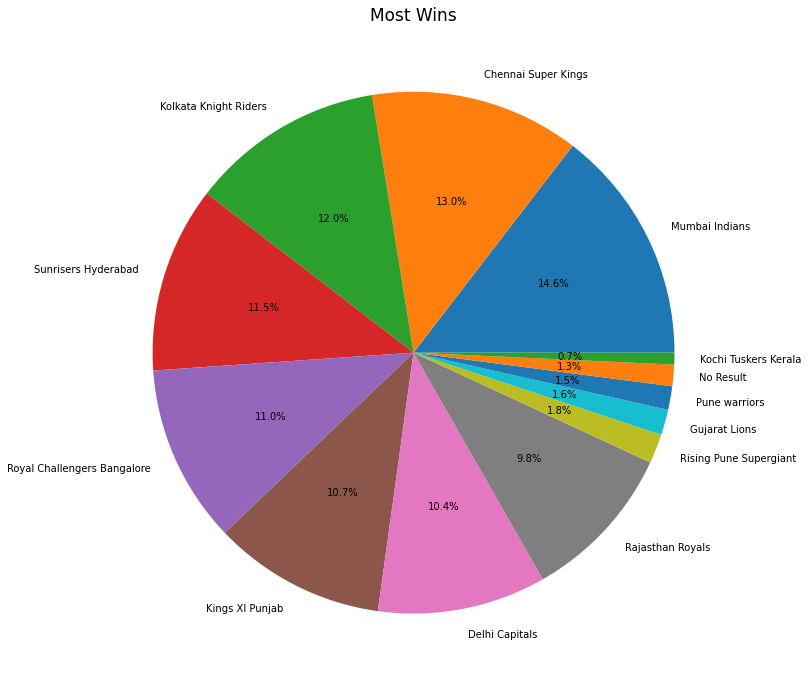

In [47]:
temp=pd.DataFrame({'winner':df_upto2020['winner']})
count_wins=temp.value_counts()
#print(count_wins)
labels=[X[0]for X in count_wins.keys()]
bar,ax =plt.subplots(figsize=(20,12))
ax=plt.pie(x=count_wins,autopct='%.1f%%',labels=labels)
plt.title('Most Wins',fontsize=17)

<AxesSubplot:xlabel='Years'>

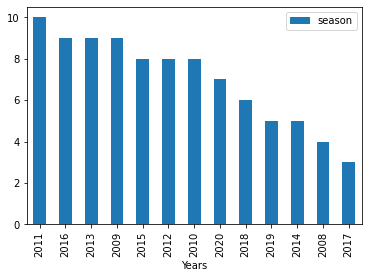

In [51]:
### Wins of RCB in different season
rcb_wins=df_upto2020[df_upto2020['winner']=='Royal Challengers Bangalore']['season'].value_counts().reset_index()
rcb_wins.rename(columns={'index':'Years'},inplace=True)
s9 =rcb_wins.head(25)
s9.plot.bar(x="Years")

# Analysis of rcb in 2021

In [ ]:
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
rcb=(df['season']=='2021')
df_rcb0=df[rcb]
df_rcb0.head()

In [82]:
#Analysis of rcb in 2021
dfk= pd.read_csv(r"C:./Desktop/ALL_2021_IPL_MATCHES_BALL_BY_BALL.csv")
dfk

,match_name,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,...,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
0,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.1,CA Lynn,RG Sharma,Mohammed Siraj,0,2,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
1,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.2,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
2,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.3,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
3,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.4,CA Lynn,RG Sharma,Mohammed Siraj,0,2,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
4,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.5,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14408,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.2,LH Ferguson,Shivam Mavi,DJ Bravo,0,1,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14409,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.3,Shivam Mavi,LH Ferguson,DJ Bravo,0,1,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14410,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.4,LH Ferguson,Shivam Mavi,DJ Bravo,0,0,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14411,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.5,LH Ferguson,Shivam Mavi,DJ Bravo,0,0,...,Shivam Mavi,caught,DL Chahar,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15


In [84]:
aruns = dfk.groupby(['batsman'])['batsman_run'].sum().reset_index()
aruns.columns=['Batsman','Runs']
y10 = aruns.sort_values(by='Runs',ascending=False ).head(15)
y10

,Batsman,Runs
105,RD Gaikwad,635
33,F du Plessis,633
61,KL Rahul,626
113,S Dhawan,587
37,GJ Maxwell,513
128,SV Samson,484
96,PP Shaw,479
134,Shubman Gill,478
74,MA Agarwal,441
108,RR Pant,419


<AxesSubplot:xlabel='Batsman'>

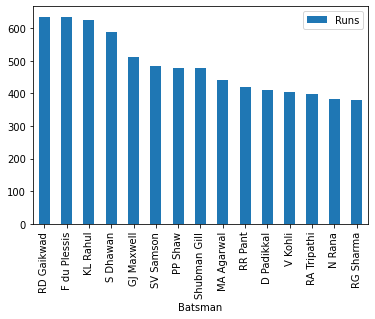

In [86]:
y10.plot.bar(x="Batsman")

<AxesSubplot:xlabel='Types of runs'>

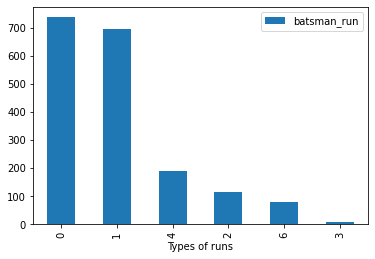

In [93]:
rcb_wins1=dfk[dfk['batting_team']=='Royal Challengers Bangalore']['batsman_run'].value_counts().reset_index()
rcb_wins1.rename(columns={'index':'Types of runs'},inplace=True)
s9 =rcb_wins1.head(25)
s9.plot.bar(x="Types of runs")

<AxesSubplot:xlabel='Types of runs'>

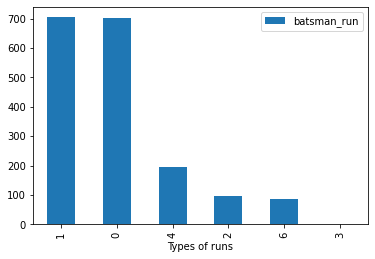

In [136]:
#When rcb bowls
rcb_wins4=dfk[dfk['bowling_team']=='Royal Challengers Bangalore']['batsman_run'].value_counts().reset_index()
rcb_wins4.rename(columns={'index':'Types of runs'},inplace=True)
s9 =rcb_wins4.head(25)
s9.plot.bar(x="Types of runs")

In [99]:
rcb=(df['batting_team']=='Royal Challengers Bangalore')
df_rcb0=df[rcb]
df_rcb0.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Batsman out'>

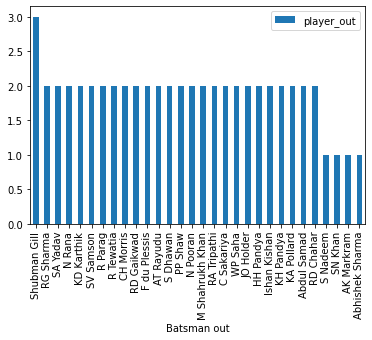

In [118]:
rcb_wins2=dfk[dfk['bowling_team']=='Royal Challengers Bangalore']['player_out'].value_counts().reset_index()
rcb_wins2.rename(columns={'index':'Batsman out'},inplace=True)
s12 =rcb_wins2.head(30)
s12.plot.bar(x="Batsman out")

<AxesSubplot:xlabel='player_out'>

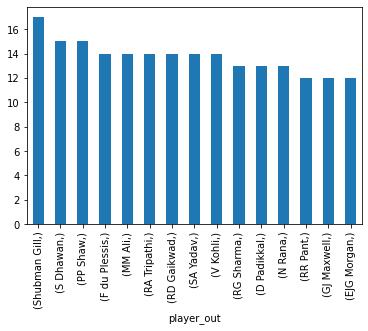

In [135]:

temp1=pd.DataFrame({'player_out':dfk['player_out']})
count_outs=temp1.value_counts()
s13 =count_outs.head(15)
s13.plot.bar()

In [3]:
import pandas as pd
delivery = pd.read_csv(r"C:./Desktop/ALL_2021_IPL_MATCHES_BALL_BY_BALL.csv")
sub_data11 = delivery.loc[:, ['batsman', 'batsman_run']]
sub_data = sub_data11.groupby('batsman', as_index = False).sum()
sub_data = sub_data.sort_values(by=['batsman_run'], ascending = False)
batsman = sub_data['batsman'].tolist()
runs = sub_data['batsman_run'].tolist()

In [5]:
sub_data14 = delivery.loc[:, ['batsman', 'bowler', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()

In [14]:
d13 = {'Player':bowler,'Wickets':wickets}
d23 = {'Player':batsman,'Runs':runs}
df13 = pd.DataFrame(d13)
df23 = pd.DataFrame(d23)
dff=df13.head(10)
dff

,Player,Wickets
0,HV Patel,32
1,Avesh Khan,24
2,SN Thakur,21
3,JJ Bumrah,21
4,Mohammed Shami,19
5,CV Varun,18
6,Arshdeep Singh,18
7,YS Chahal,18
8,Rashid Khan,18
9,JO Holder,16


<AxesSubplot:xlabel='Player'>

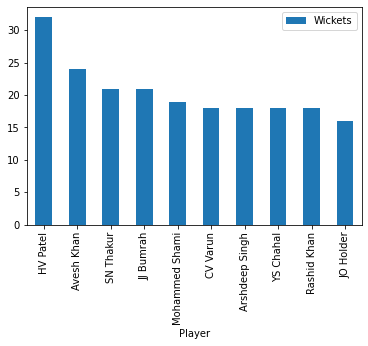

In [17]:
dff.plot.bar(x='Player')

In [20]:
sub_data14 = delivery.loc[:, ['batsman', 'bowling_team', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowling_team']]
bowler = bowler_data['bowling_team'].value_counts().keys().tolist()
wickets = bowler_data['bowling_team'].value_counts().tolist()

In [22]:
d1 = {'Teams':bowler,'Wickets':wickets}
d2 = {'Teams':batsman,'Runs':runs}
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df1

,Teams,Wickets
0,Kolkata Knight Riders,100
1,Delhi Capitals,96
2,Chennai Super Kings,96
3,Royal Challengers Bangalore,92
4,Mumbai Indians,77
5,Punjab Kings,75
6,Sunrisers Hyderabad,72
7,Rajasthan Royals,62


<AxesSubplot:xlabel='Teams'>

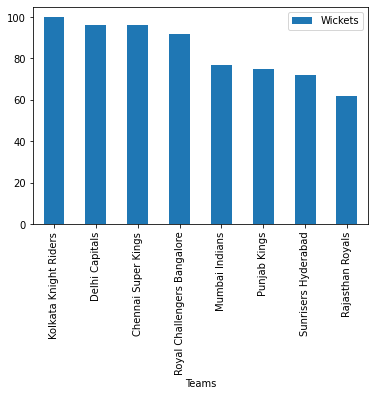

In [23]:
df1.plot.bar(x='Teams')#total wickets by each team in 2021

In [28]:
import pandas as pd
df = pd.read_csv(r"C:./Desktop/ALL_2021_IPL_MATCHES_BALL_BY_BALL.csv")
rcb=(df['batting_team']=='Royal Challengers Bangalore')
df_rcb0=df[rcb]

delivery1 =df_rcb0
sub_data12 = delivery1.loc[:, ['batsman', 'batsman_run']]
sub_data = sub_data12.groupby('batsman', as_index = False).sum()
sub_data = sub_data.sort_values(by=['batsman_run'], ascending = False)
batsman = sub_data['batsman'].tolist()
runs = sub_data['batsman_run'].tolist()

In [29]:
sub_data14 = delivery1.loc[:, ['batsman', 'bowler', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()

<AxesSubplot:xlabel='Teams'>

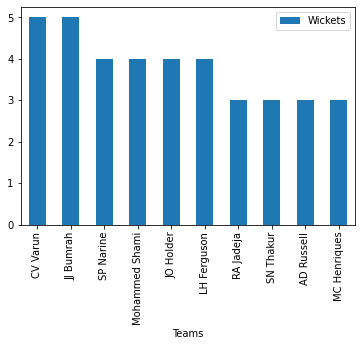

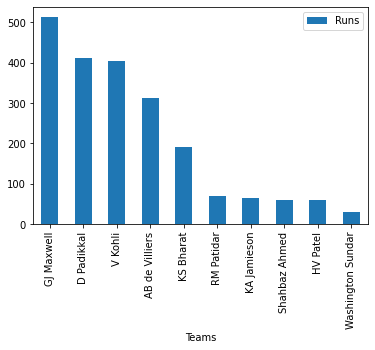

In [47]:
d17 = {'Bowlers_aganist_rcb':bowler,'Wickets':wickets}
d27 = {'Rcb batsman':batsman,'Runs':runs}
df17 = pd.DataFrame(d1)
df27 = pd.DataFrame(d2)
df17
dfg=df17.head(10)
dfg.plot.bar(x='Teams')
dfh=df27.head(10)
dfh.plot.bar(x='Teams')

# CSK 2020 & 2021

# 2020 overall

In [50]:

df= pd.read_csv(r"C:./Desktop/all_matches.csv")
csk=(df['season']=='2020/21')
df_csk0=df[csk]
df_csk0.head()

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179058,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179059,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179060,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.3,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179061,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.4,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179062,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
runs1 = df_csk0.groupby(['batting_team'])['runs_off_bat'].sum().reset_index()
runs1.columns=['Batting team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y

,Batting team,Runs
4,Mumbai Indians,2662
1,Delhi Capitals,2658
7,Sunrisers Hyderabad,2397
2,Kings XI Punjab,2264
5,Rajasthan Royals,2197
6,Royal Challengers Bangalore,2169
3,Kolkata Knight Riders,2124
0,Chennai Super Kings,2095


Text(0.5, 1.0, 'Total Runs scored by all Teams in 2020')

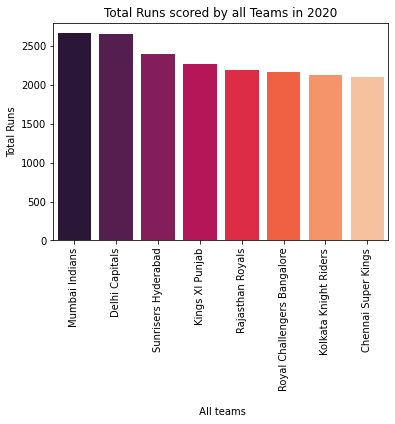

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()
sns.barplot(x=y['Batting team'],y=y['Runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n All teams')
plt.ylabel('Total Runs')
plt.title('Total Runs scored by all Teams in 2020')

<AxesSubplot:xlabel='striker'>

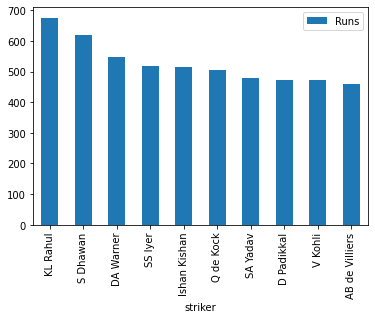

In [64]:
#top 10 run scorers in 2020 
runs1 = df_csk0.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs1.columns=['striker','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='striker')

In [67]:
sub_data14 = df_csk0.loc[:, ['striker', 'bowler', 'wicket_type']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['wicket_type'] == 'bowled') | (sub_data14['wicket_type'] == 'caught') | (sub_data14['wicket_type'] == 'caught and bowled') | (sub_data14['wicket_type'] == 'stumped') | (sub_data14['wicket_type'] == 'lbw') | (sub_data14['wicket_type'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()

<AxesSubplot:xlabel='Bowlers'>

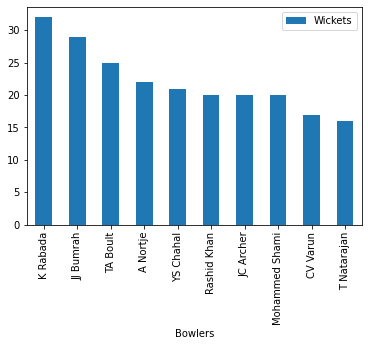

In [72]:
d1 = {'Bowlers':bowler,'Wickets':wickets}
d2 = {'Bowlers':batsman,'Runs':runs}
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df1
dfg=df1.head(10)
dfg.plot.bar(x='Bowlers')

In [74]:
sub_data14 = df_csk0.loc[:, ['striker', 'bowling_team', 'wicket_type']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['wicket_type'] == 'bowled') | (sub_data14['wicket_type'] == 'caught') | (sub_data14['wicket_type'] == 'caught and bowled') | (sub_data14['wicket_type'] == 'stumped') | (sub_data14['wicket_type'] == 'lbw') | (sub_data14['wicket_type'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowling_team']]
bowler = bowler_data['bowling_team'].value_counts().keys().tolist()
wickets = bowler_data['bowling_team'].value_counts().tolist()

<AxesSubplot:xlabel='bowling_team'>

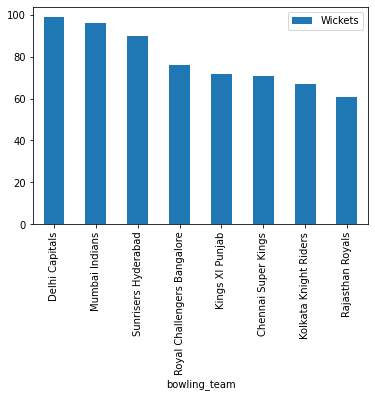

In [78]:
d1 = {'bowling_team':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
dfg=df1.head(10)
dfg.plot.bar(x='bowling_team')

<AxesSubplot:xlabel='Bowling team'>

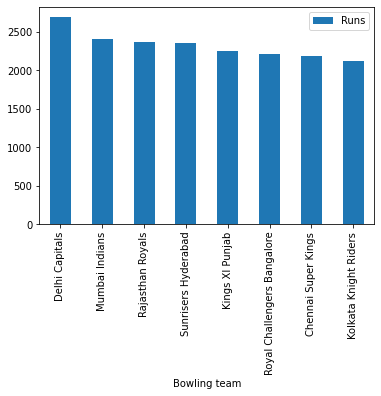

In [81]:
##Most runs concieved
runs1 = df_csk0.groupby(['bowling_team'])['runs_off_bat'].sum().reset_index()
runs1.columns=['Bowling team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y#runs against all teams
y.plot.bar(x='Bowling team')

<AxesSubplot:xlabel='Bowling team'>

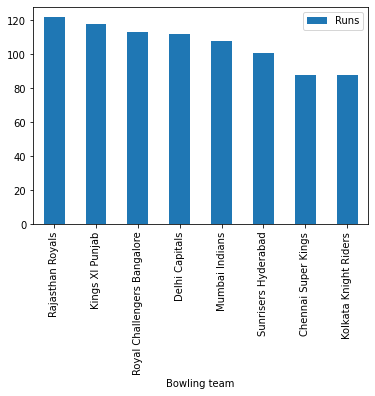

In [82]:
runs1 = df_csk0.groupby(['bowling_team'])['extras'].sum().reset_index()
runs1.columns=['Bowling team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y#top extras by all teams
y.plot.bar(x='Bowling team')

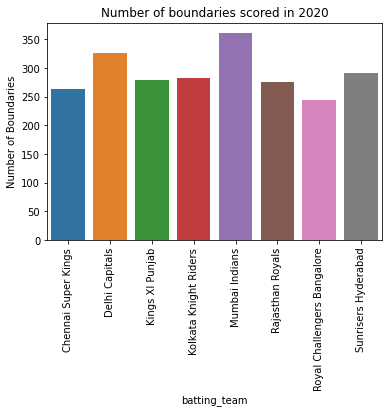

In [92]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.xticks(rotation=90)
    plt.show()
    #number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = df_csk0[(df_csk0['runs_off_bat']==4) | (df_csk0['runs_off_bat']==6)].groupby(['batting_team'])['runs_off_bat'].count().reset_index()
#barplot
barplot('batting_team', 'runs_off_bat', boundaries_per_season, 'Number of boundaries scored in 2020',
        'batting_team', 'Number of Boundaries')

# As a batting team CSK performance in 2020

In [105]:
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
csk=(df['season']=='2020/21')
df_csk9=df[csk]

cskb=(df_csk9['batting_team']=='Chennai Super Kings')
df_csk10=df_csk9[cskb]
df_csk10.head()# matches by csk in 2020 as batting team

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179182,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,2,0.1,Chennai Super Kings,Mumbai Indians,M Vijay,SR Watson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179183,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,2,0.2,Chennai Super Kings,Mumbai Indians,SR Watson,M Vijay,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179184,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,2,0.3,Chennai Super Kings,Mumbai Indians,SR Watson,M Vijay,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179185,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,2,0.4,Chennai Super Kings,Mumbai Indians,SR Watson,M Vijay,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179186,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,2,0.5,Chennai Super Kings,Mumbai Indians,SR Watson,M Vijay,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='striker'>

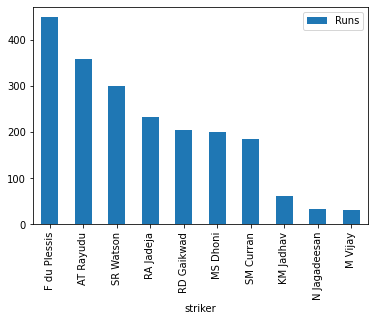

In [106]:
#top 10 run scorers in 2020 
runs1 = df_csk10.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs1.columns=['striker','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='striker')

<AxesSubplot:xlabel='bowling_team'>

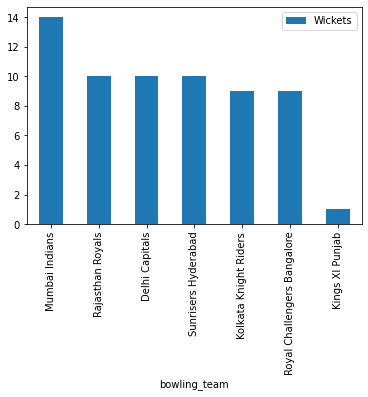

In [111]:
#Most wickets against teams
sub_data14 = df_csk10.loc[:, ['striker', 'bowling_team', 'wicket_type']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['wicket_type'] == 'bowled') | (sub_data14['wicket_type'] == 'caught') | (sub_data14['wicket_type'] == 'caught and bowled') | (sub_data14['wicket_type'] == 'stumped') | (sub_data14['wicket_type'] == 'lbw') | (sub_data14['wicket_type'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowling_team']]
bowler = bowler_data['bowling_team'].value_counts().keys().tolist()
wickets = bowler_data['bowling_team'].value_counts().tolist()
d1 = {'bowling_team':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
dfg=df1.head(10)
dfg.plot.bar(x='bowling_team')

<AxesSubplot:xlabel='bowling_team'>

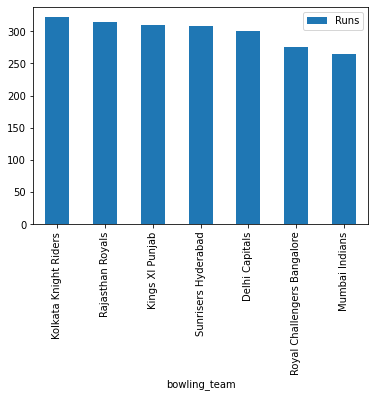

In [112]:
#top runs by csk  in 2020
runs1 = df_csk10.groupby(['bowling_team'])['runs_off_bat'].sum().reset_index()
runs1.columns=['bowling_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='bowling_team')

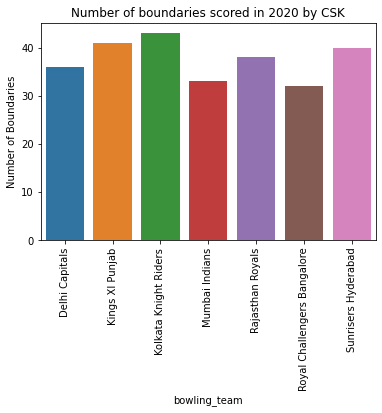

In [115]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.xticks(rotation=90)
    plt.show()
    #number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = df_csk10[(df_csk10['runs_off_bat']==4) | (df_csk10['runs_off_bat']==6)].groupby(['bowling_team'])['runs_off_bat'].count().reset_index()
#barplot
barplot('bowling_team', 'runs_off_bat', boundaries_per_season, 'Number of boundaries scored in 2020 by CSK',
        'bowling_team', 'Number of Boundaries')

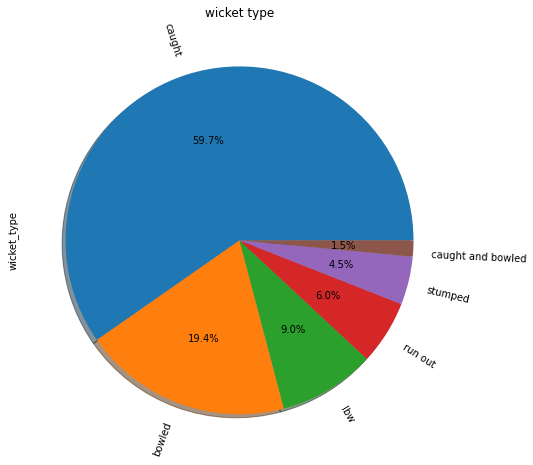

In [117]:
#batsman are out by wicket types-
df_csk10['wicket_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,8),shadow=True,rotatelabels=True)
plt.title('wicket type')
plt.show()

# As a bowling team CSK in 2020

In [119]:
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
csk=(df['season']=='2020/21')
df_csk9=df[csk]

cskb=(df_csk9['bowling_team']=='Chennai Super Kings')
df_csk11=df_csk9[cskb]
df_csk11.head()# matches by csk in 2020 as bowling team

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179058,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179059,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179060,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.3,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179061,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.4,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179062,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='striker'>

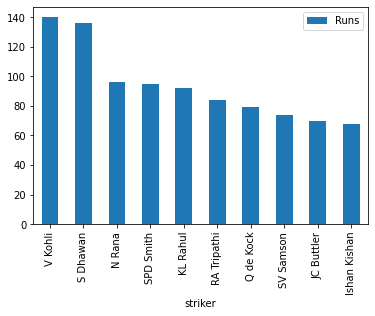

In [120]:
#top 10 run scorers against csk in 2020 
runs1 = df_csk11.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs1.columns=['striker','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='striker')

<AxesSubplot:xlabel='batting_team'>

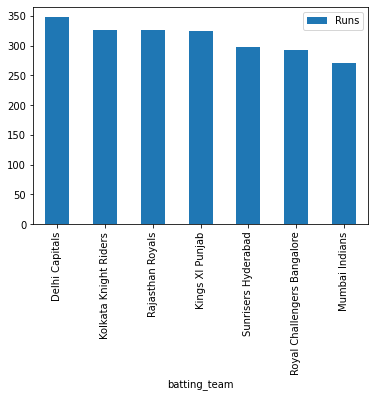

In [121]:
#top runs by teams against csk in 2020 
runs1 = df_csk10.groupby(['batting_team'])['runs_off_bat'].sum().reset_index()
runs1.columns=['batting_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='batting_team')

<AxesSubplot:xlabel='bowler'>

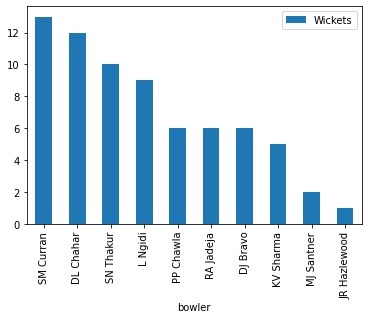

In [123]:
#Most wickets takers
sub_data14 = df_csk11.loc[:, ['striker', 'bowler', 'wicket_type']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['wicket_type'] == 'bowled') | (sub_data14['wicket_type'] == 'caught') | (sub_data14['wicket_type'] == 'caught and bowled') | (sub_data14['wicket_type'] == 'stumped') | (sub_data14['wicket_type'] == 'lbw') | (sub_data14['wicket_type'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()
d1 = {'bowler':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
dfg=df1.head(10)
dfg.plot.bar(x='bowler')

<AxesSubplot:xlabel='batting_team'>

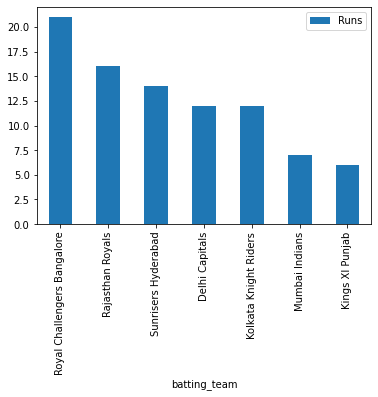

In [125]:
#most extras by csk
runs1 = df_csk11.groupby(['batting_team'])['extras'].sum().reset_index()
runs1.columns=['batting_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='batting_team')

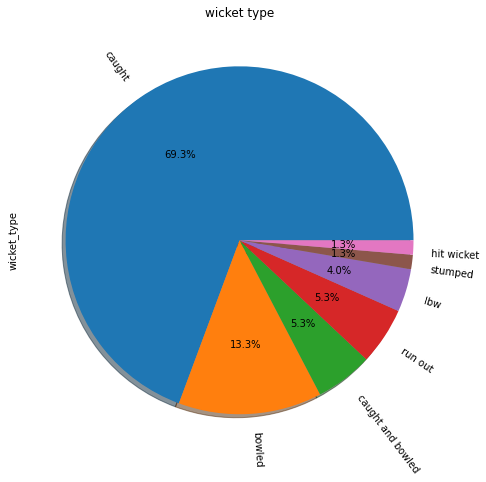

In [126]:
#Wickets by csk bowlers
df_csk11['wicket_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,8),shadow=True,rotatelabels=True)
plt.title('wicket type')
plt.show()

# overall 2021